<a href="https://colab.research.google.com/github/Vishwajeet111/Classification-of-Leaves-disease/blob/master/Trial_v_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Mounting from the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Mentioning the image size and color channels
image_size = 256
channels = 3

In [4]:
# Augmenting images from train dataset and storing it in train_generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    horizontal_flip = True
)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/leaves_image2/train',
    target_size = (image_size,image_size),
    batch_size=32,
    class_mode="sparse",
    shuffle=True
)

Found 21472 images belonging to 19 classes.


In [ ]:
# counting the number of images in train generator and storing the values in dictionary
train_count = []
i = 0
while i in range(len(train_generator)):
  image_label, label_batch = next(train_generator)
  print(i)
  train_count.extend(list(label_batch))
  i+= 1
train_count = list(map(int, train_count))
train_dict = dict.fromkeys(set(train_count), 0)
for i in train_count:
  if i in train_dict.keys():
    train_dict[i] += 1

print(train_dict)

In [15]:
# printing the class names
class_names = list(train_generator.class_indices.keys())
print(class_names)

['Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


Text(0.5, 1.0, 'Count of images in Training set')

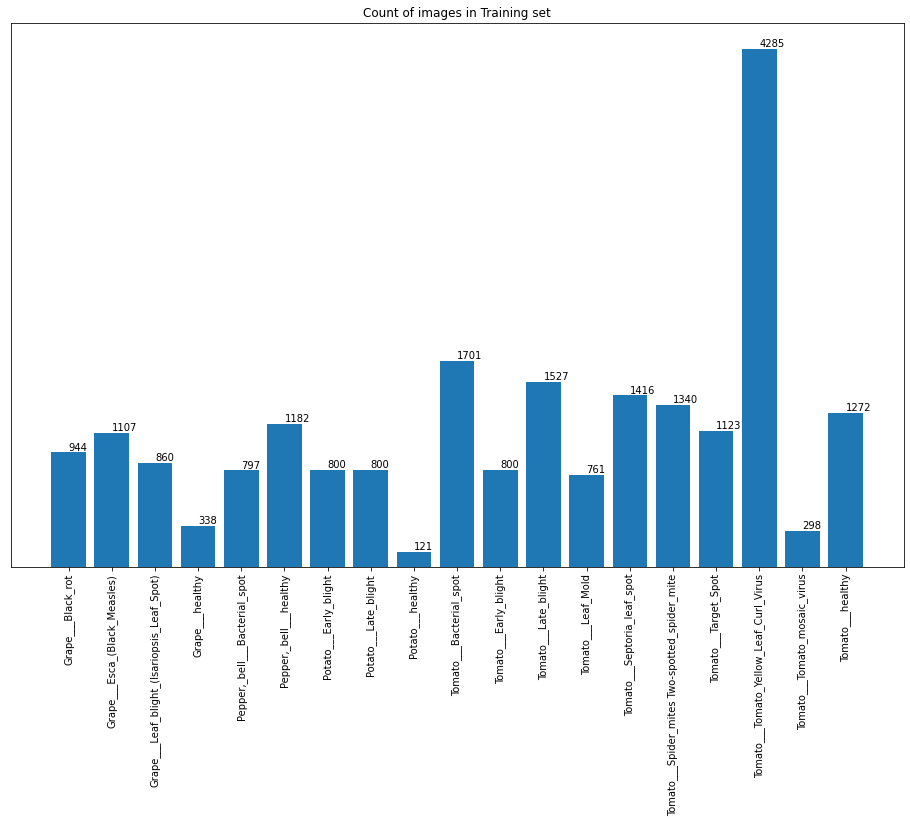

In [ ]:
# plotting the bar graph of train dataset
plt.rcParams['figure.figsize'] = (16,10)
barplot = plt.bar(x=class_names,height=train_dict.values())
plt.xticks(rotation=90)
plt.yticks([])
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')
plt.title("Count of images in Training set")

In [5]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    horizontal_flip = True
)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/leaves_image2/test',
    target_size = (image_size,image_size),
    batch_size=32,
    class_mode="sparse",
    shuffle = False
)

Found 2700 images belonging to 19 classes.


In [ ]:
# counting the number of images in test generator and storing the values in dictionary
test_count = []
i = 0
while i in range(len(test_generator)):
  image_label, label_batch = next(test_generator)
  print(i)
  test_count.extend(list(label_batch))
  i+= 1
test_count = list(map(int, test_count))
test_dict = dict.fromkeys(set(test_count), 0)

for i in test_count:
  if i in test_dict.keys():
    test_dict[i] += 1
print(test_dict)

Text(0.5, 1.0, 'Count of images in testing set')

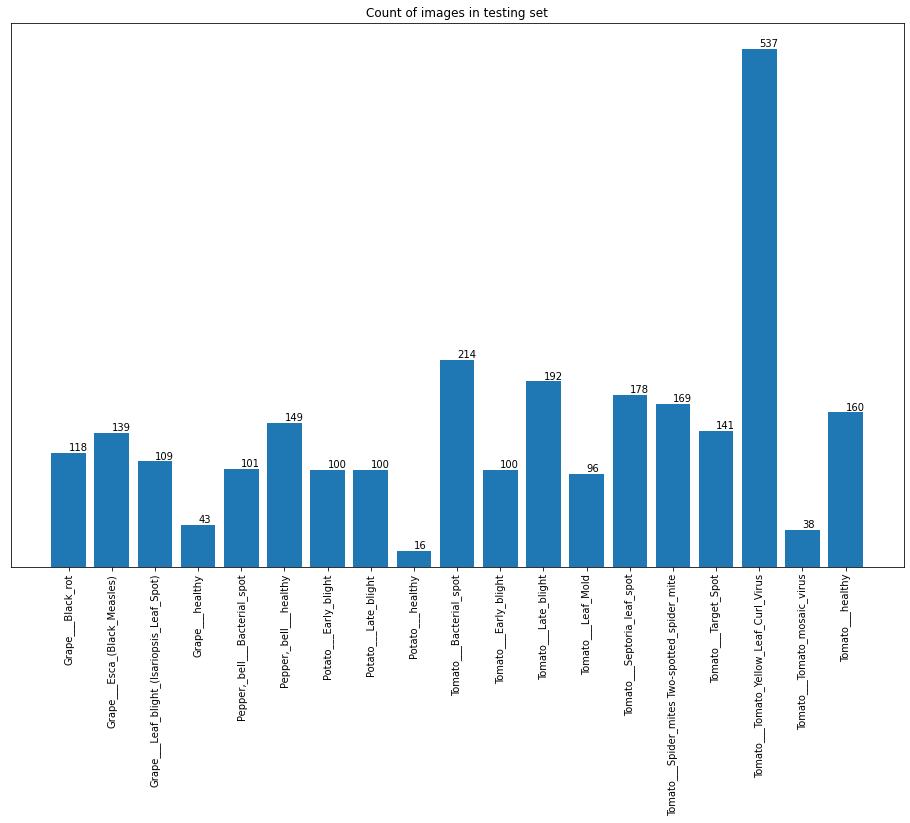

In [ ]:
# plotting the bar graph of test dataset
plt.rcParams['figure.figsize'] = (16,10)
barplot = plt.bar(x=class_names,height=test_dict.values())
plt.xticks(rotation=90)
plt.yticks([])
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')
plt.title("Count of images in testing set")

In [6]:
val_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    horizontal_flip = True
)
val_generator = val_datagen.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/leaves_image2/val",
    target_size = (image_size,image_size),
    batch_size=32,
    class_mode="sparse",
    shuffle=False
)

Found 2678 images belonging to 19 classes.


In [ ]:
# counting the number of images in val generator and storing the values in dictionary
val_count = []
i = 0
while i in range(len(val_generator)):
  image_label, label_batch = next(val_generator)
  print(i)
  val_count.extend(list(label_batch))
  i+= 1
val_count = list(map(int, val_count))
val_dict = dict.fromkeys(set(val_count), 0)

for i in val_count:
  if i in val_dict.keys():
    val_dict[i] += 1
print(val_dict)

Text(0.5, 1.0, 'Count of images in validation set')

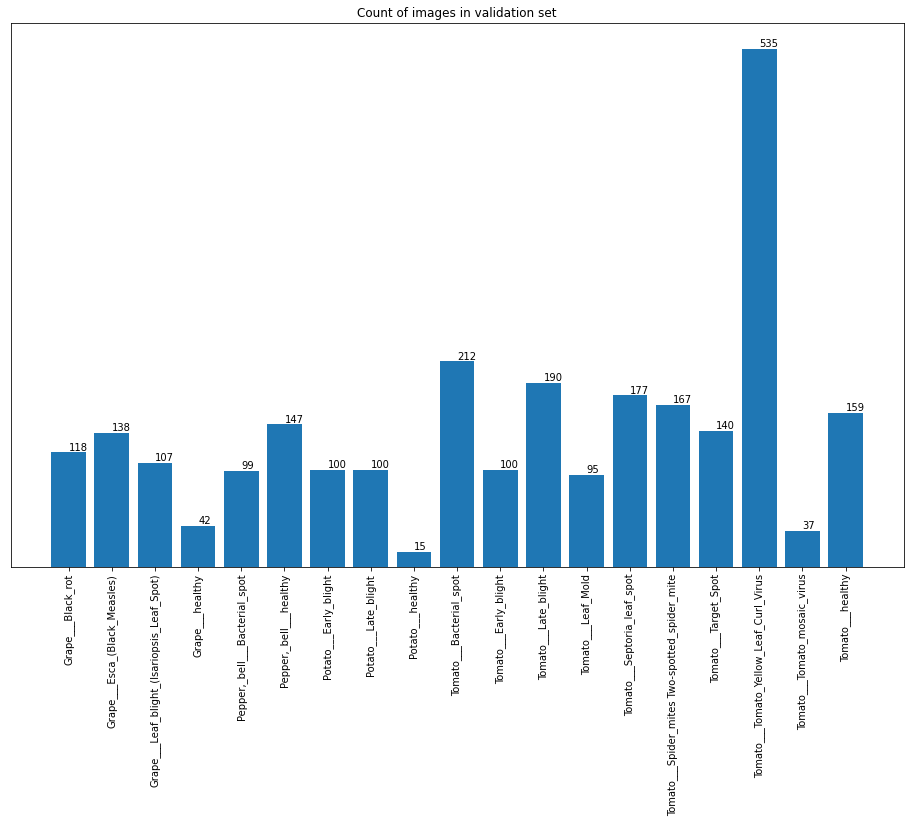

In [ ]:
# plotting the bar graph of val dataset
barplot = plt.bar(x=class_names,height= val_dict.values())
plt.xticks(rotation=90)
plt.yticks([])
for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')
plt.title("Count of images in validation set")

In [7]:
input_shape = (image_size,image_size,channels)
n_classes = 19
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor="val_loss",min_delta=0.00001,patience=2,verbose=1,mode="auto",baseline=None,restore_best_weights=False)

In [9]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [10]:
history = model.fit(
    train_generator,steps_per_epoch=len(train_generator),batch_size=32,validation_data=val_generator,
    validation_steps=len(val_generator),verbose=1,epochs=20,callbacks=callback)

Epoch 1/20
671/671 [==============================] - 5631s 8s/step - loss: 1.2429 - accuracy: 0.5916 - val_loss: 0.8980 - val_accuracy: 0.6953
Epoch 2/20
671/671 [==============================] - 353s 526ms/step - loss: 0.6084 - accuracy: 0.7954 - val_loss: 0.4959 - val_accuracy: 0.8301
Epoch 3/20
671/671 [==============================] - 350s 521ms/step - loss: 0.4040 - accuracy: 0.8610 - val_loss: 0.4118 - val_accuracy: 0.8757
Epoch 4/20
671/671 [==============================] - 348s 519ms/step - loss: 0.3136 - accuracy: 0.8932 - val_loss: 0.3147 - val_accuracy: 0.8981
Epoch 5/20
671/671 [==============================] - 350s 521ms/step - loss: 0.2636 - accuracy: 0.9109 - val_loss: 0.2878 - val_accuracy: 0.9044
Epoch 6/20
671/671 [==============================] - 348s 518ms/step - loss: 0.2286 - accuracy: 0.9193 - val_loss: 0.3140 - val_accuracy: 0.9040
Epoch 7/20
671/671 [==============================] - 348s 518ms/step - loss: 0.1955 - accuracy: 0.9319 - val_loss: 0.2373 - v

In [11]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('The accuracy of the testing dataset is {} and the loss of the testing dataset is {}'.format(test_accuracy*100, test_loss*100))

85/85 [==============================] - 607s 7s/step - loss: 0.2216 - accuracy: 0.9352
The accuracy of the testing dataset is 93.5185194015503 and the loss of the testing dataset is 22.16246724128723


**Accuracy and Loss graph**

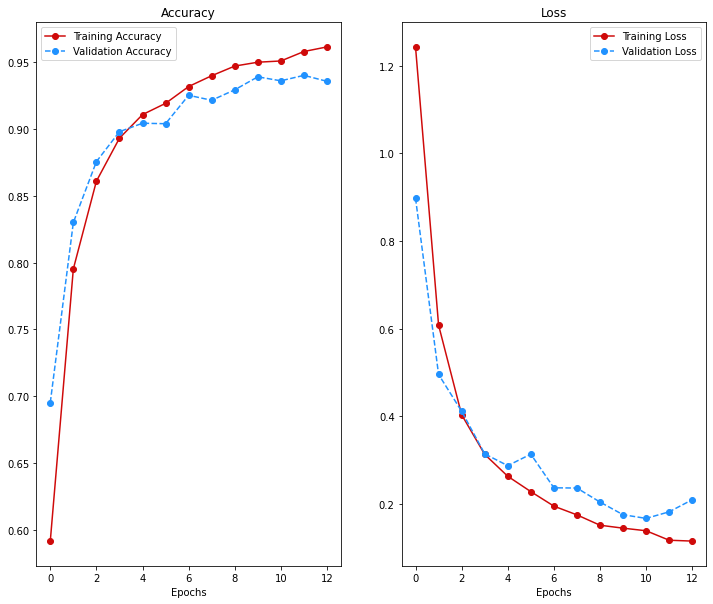

In [12]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs_range = range(13)

plt.rcParams['figure.figsize'] = (10,12)
plt.subplot(1,2,1)
plt.plot(epochs_range, accuracy,'-o', label='Training Accuracy',color="#CF0A0A")
plt.plot(epochs_range, val_accuracy,'o--', label='Validation Accuracy',color="#2192FF")
plt.xlabel("Epochs")
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss,'-o', label='Training Loss',color="#CF0A0A")
plt.plot(epochs_range, val_loss,'o--', label='Validation Loss',color="#2192FF")
plt.xlabel("Epochs")
plt.legend()
plt.title('Loss')
plt.show();

**Confusion Matrix**

In [13]:
y_prob = model.predict(test_generator, verbose = True)
y_pred = np.argmax(y_prob, axis=1)

85/85 [==============================] - 38s 451ms/step


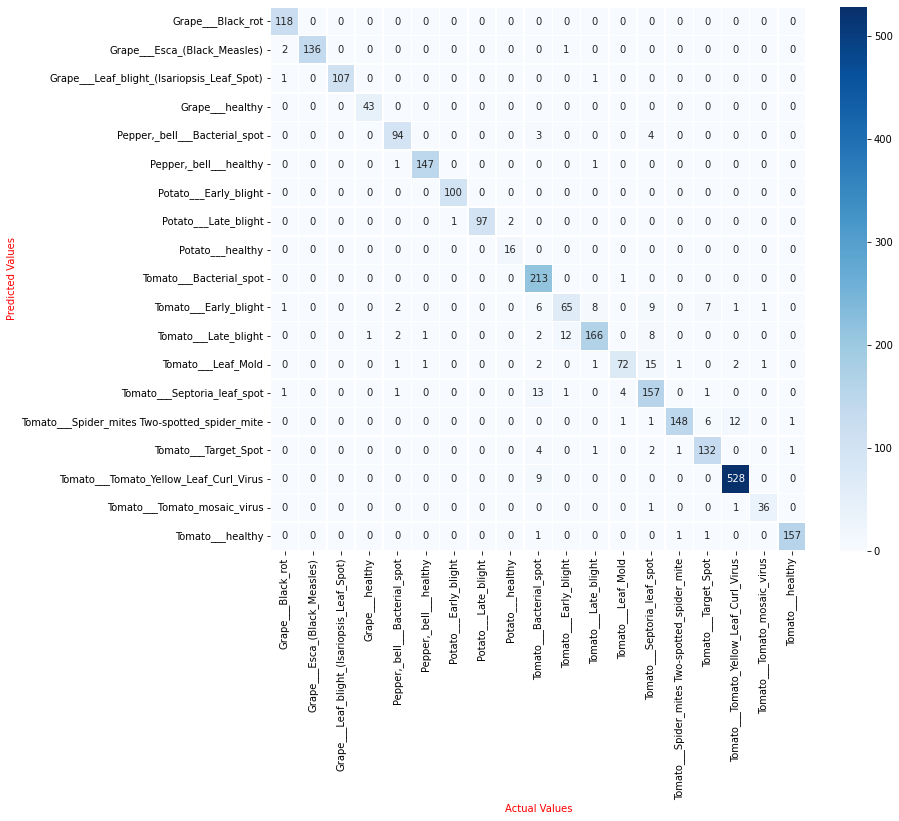

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_generator.classes, y_pred)
sns.heatmap(cm,annot=True,cmap="Blues",fmt='g',linewidth=.5,xticklabels=class_names,yticklabels=class_names)
plt.xlabel("Actual Values",size=10,color='red')
plt.ylabel("Predicted Values",size=10,color='red')
plt.show()

**Classification report**

In [22]:
target_names = list(train_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

                                               precision    recall  f1-score   support

                            Grape___Black_rot       0.96      1.00      0.98       118
                 Grape___Esca_(Black_Measles)       1.00      0.98      0.99       139
   Grape___Leaf_blight_(Isariopsis_Leaf_Spot)       1.00      0.98      0.99       109
                              Grape___healthy       0.98      1.00      0.99        43
                Pepper,_bell___Bacterial_spot       0.93      0.93      0.93       101
                       Pepper,_bell___healthy       0.99      0.99      0.99       149
                        Potato___Early_blight       0.99      1.00      1.00       100
                         Potato___Late_blight       1.00      0.97      0.98       100
                             Potato___healthy       0.89      1.00      0.94        16
                      Tomato___Bacterial_spot       0.84      1.00      0.91       214
                        Tomato___Early_bli

**AUC and ROC curve**

In [23]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [46]:
colors = ['blue','brown','orange','pink','green','gray','red','olive','purple','cyan','violet','crimson','teal','lime','orangered','#FFEBCD','#F0FFFF','orchid','purple']

In [44]:
print(roc_auc)

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 0.9999289280574261, 10: 0.9999951704586616, 11: 0.9999821792941218, 12: 1.0, 13: 0.9999817477909757, 14: 0.9999974019158273, 15: 0.9999946708021242, 16: 1.0, 17: 1.0, 18: 1.0}


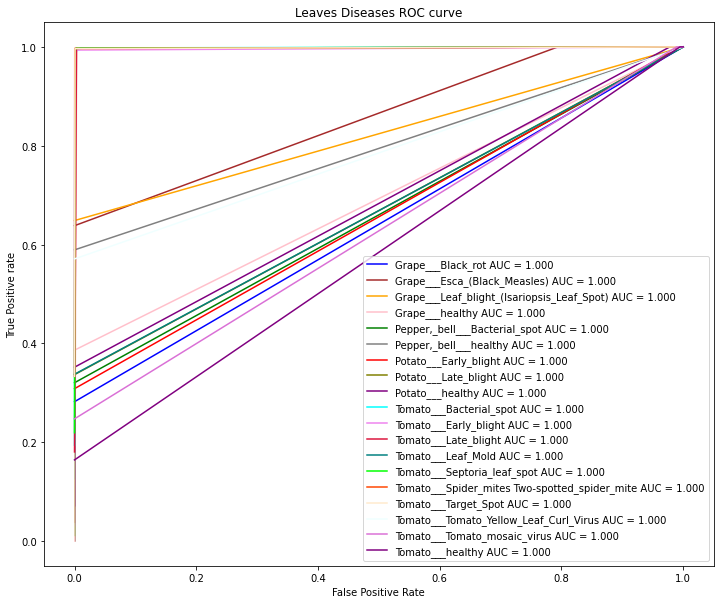

In [47]:
fpr = {}
tpr = {}
thresh = {}
roc_auc = {}
n_classes = len(class_names)
for i in range(n_classes):
  fpr[i], tpr[i], thresh[i], = roc_curve(y_pred, y_prob[:,i],pos_label=i)
  roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
  sns.lineplot(x=fpr[i],y=tpr[i],color=colors[i],label=class_names[i]+' AUC = %0.3f' % roc_auc[i])
plt.title('Leaves Diseases ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()

**Predicting random images**

In [51]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array, verbose=0)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [48]:
test_generator.shuffle = True

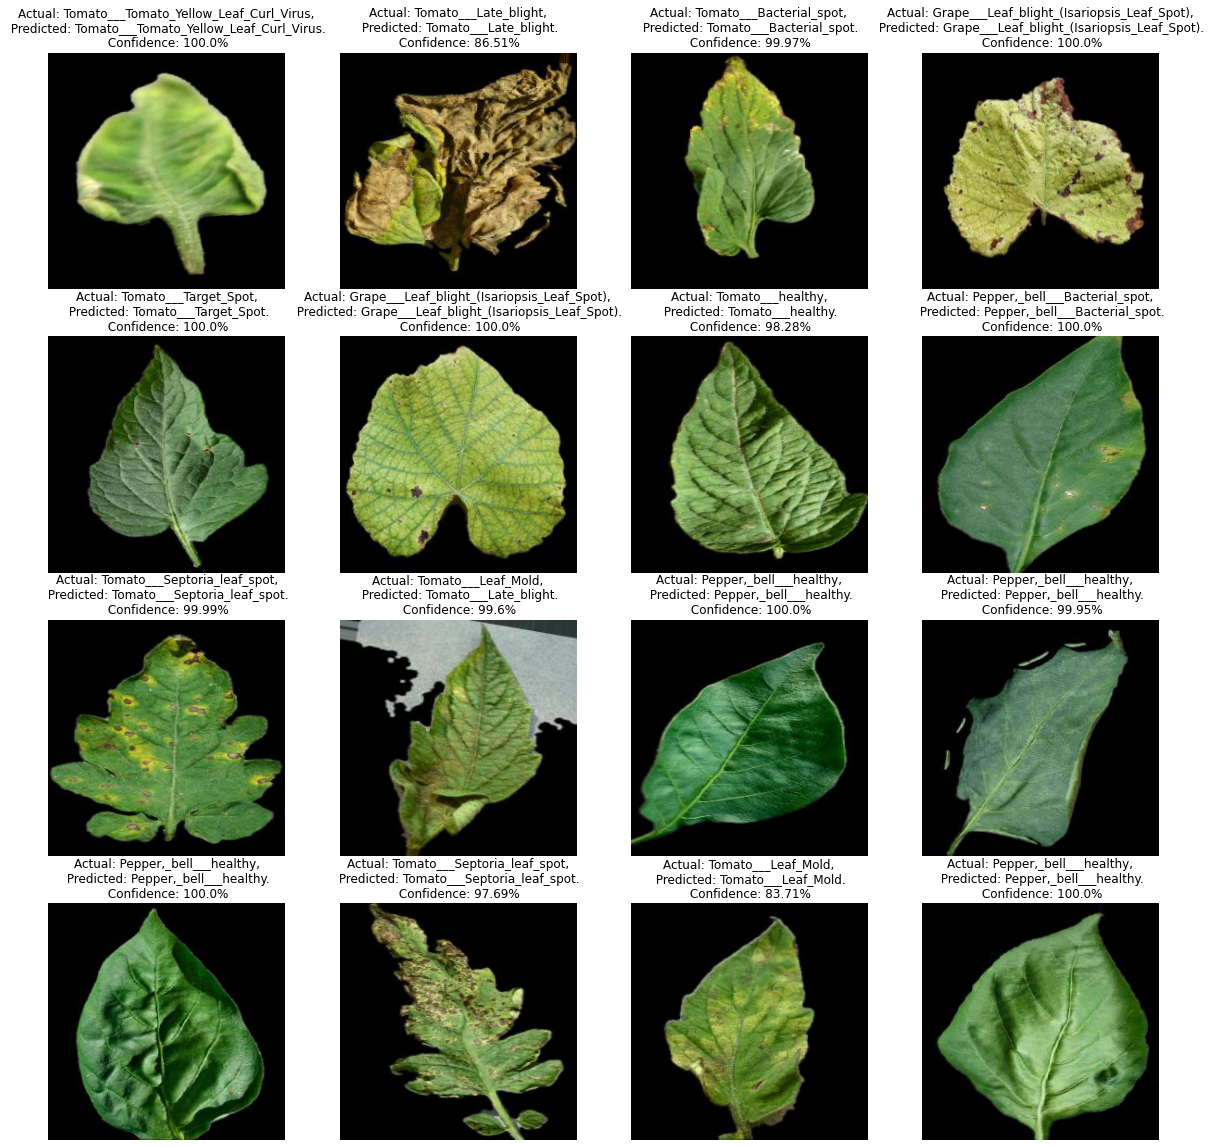

In [52]:
plt.figure(figsize=(20, 20))
for images, labels in test_generator:
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [ ]:
#tf.keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True)

In [53]:
model.save('DeepLearning.h5')